# 导入工具包

In [15]:
# 图数据挖掘
import networkx as nx 
import numpy as np
# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
import numpy.linalg # 线性代数工具包

# 创建图

In [4]:
n=1000 # 节点数
m=5000 # 边数
G=nx.gnm_random_graph(n,m,seed=5040)

# 邻接矩阵

In [5]:
A=nx.adjacency_matrix(G)
A.shape

(1000, 1000)

In [6]:
A.todense()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1000, 1000))

# 拉普拉斯矩阵

In [7]:
L=nx.laplacian_matrix(G)
L.shape

(1000, 1000)

In [8]:
# 节点Degree对角矩阵
D=L+A
D.todense()

array([[12,  0,  0, ...,  0,  0,  0],
       [ 0,  6,  0, ...,  0,  0,  0],
       [ 0,  0,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  8,  0,  0],
       [ 0,  0,  0, ...,  0,  6,  0],
       [ 0,  0,  0, ...,  0,  0,  7]], shape=(1000, 1000))

# 归一化拉普拉斯矩阵

In [9]:
L_n=nx.normalized_laplacian_matrix(G)
L_n.shape

(1000, 1000)

In [10]:
L_n.todense()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(1000, 1000))

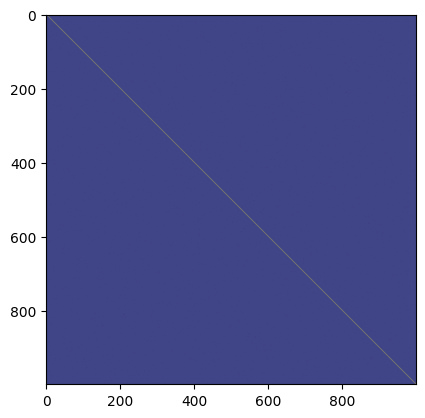

In [11]:
plt.imshow(L_n.todense())
plt.show()

In [12]:
type(L_n)

scipy.sparse._csr.csr_array

# 特征值分解

In [30]:
e = np.linalg.eigvals(L_n.toarray())
e

array([4.70407769e-16, 1.59246179e+00, 4.02846420e-01, 4.06224295e-01,
       4.12963520e-01, 4.15548851e-01, 4.16517467e-01, 1.58938840e+00,
       4.20582471e-01, 4.24326947e-01, 1.58583526e+00, 1.58139953e+00,
       1.58070318e+00, 4.29110624e-01, 4.31464217e-01, 4.33218297e-01,
       4.37026657e-01, 4.35026221e-01, 1.57786096e+00, 4.40378510e-01,
       4.42775893e-01, 4.45046086e-01, 1.57398179e+00, 1.57237733e+00,
       1.57150969e+00, 1.57095514e+00, 4.46753827e-01, 4.49417823e-01,
       4.50881547e-01, 4.48717950e-01, 1.56726875e+00, 1.56345866e+00,
       1.56395825e+00, 1.56009824e+00, 1.55880096e+00, 1.55717189e+00,
       1.55698938e+00, 1.55475549e+00, 1.54908738e+00, 1.54681927e+00,
       1.54491505e+00, 1.54352783e+00, 1.54231896e+00, 1.54051439e+00,
       1.54098279e+00, 1.53578067e+00, 1.53502733e+00, 1.53439005e+00,
       1.53085674e+00, 1.53141471e+00, 1.52838134e+00, 1.52515680e+00,
       1.52512114e+00, 1.52151217e+00, 1.52011306e+00, 1.52064972e+00,
      

In [31]:
# 最大特征值
max(e)

np.float64(1.59246179117758)

In [32]:
# 最小特征值
min(e)

np.float64(4.704077687728601e-16)

# 特征值分布直方图

d:\Anaconda3\envs\agent\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\envs\agent\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\envs\agent\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25289 (\N{CJK UNIFIED IDEOGRAPH-62C9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\envs\agent\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\envs\agent\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from font(s) DejaVu Sans.
  

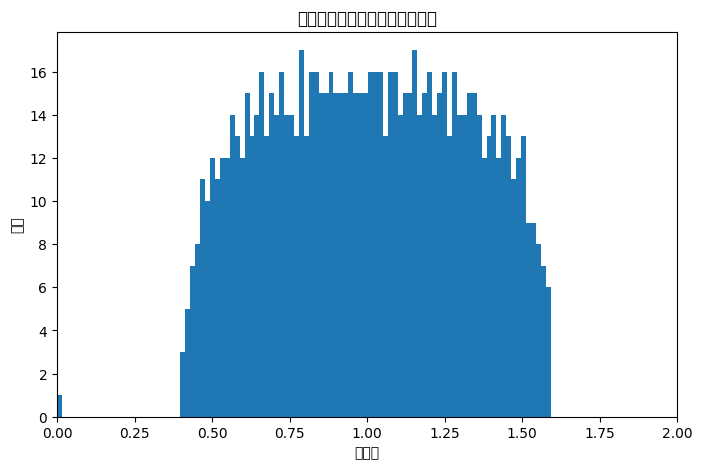

In [34]:
plt.figure(figsize=(8,5))
plt.hist(e, bins=100)
plt.xlim(0, 2)
plt.xlabel("特征值")
plt.ylabel("频数")
plt.title("拉普拉斯矩阵特征值分布直方图")
plt.show()